<a href="https://colab.research.google.com/github/aarijrab/Coding/blob/main/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
 import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [14]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2022-06-29 16:34:26--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip.1’

alfabeto_A-Z.zip.1  100%[===================>] 184.67M  50.5MB/s    in 3.7s    

2022-06-29 16:34:30 (49.5 MB/s) - ‘alfabeto_A-Z.zip.1’ saved [193643888/193643888]



In [15]:
zip_object=zipfile.ZipFile(file='/content/alfabeto_A-Z.zip', mode='r')
zip_object.extractall('./')
zip_object.close()

In [16]:
 dataset_az=pd.read_csv('/content/A_Z Handwritten Data.csv')
 dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
alphabet_data=dataset_az.drop('0',axis=1)
alphabet_labels=dataset_az['0']

In [18]:
alphabet_data.shape

(372450, 784)

In [19]:
alphabet_data=np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28,28))

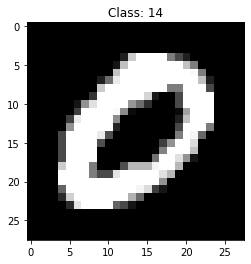

In [20]:
index=np.random.randint(0,alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap='gray')
plt.title('Class: '+ str(alphabet_labels[index]));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


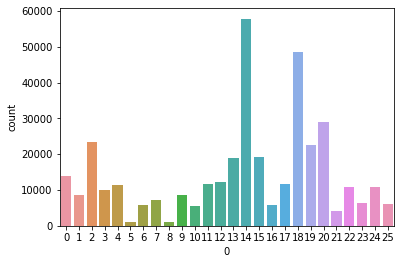

In [21]:
sns.countplot(alphabet_labels);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


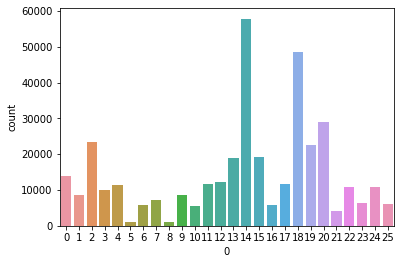

In [22]:
sns.countplot(alphabet_labels);


In [23]:
from tensorflow.keras.datasets import mnist

In [24]:
(train_data,train_labels), (test_data, test_labels) = mnist.load_data()

In [25]:
train_data[0].shape

(28, 28)

In [26]:
digits_data=np.vstack([train_data, test_data])
digits_labels= np.hstack([train_labels, test_labels])

Text(0.5, 1.0, 'Class: 5')

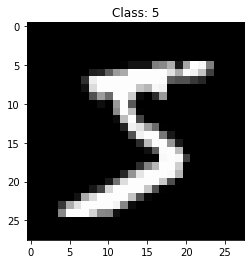

In [27]:
plt.imshow(digits_data[0], cmap='gray')
plt.title('Class: ' +str(digits_labels[0]))

In [28]:
digits_labels

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [29]:
digits_labels,np.unique(digits_labels)

(array([5, 0, 4, ..., 4, 5, 6], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [30]:
alphabet_labels

0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: 0, Length: 372450, dtype: int64

In [31]:
alphabet_labels+=10


In [32]:
alphabet_labels

0         10
1         10
2         10
3         10
4         10
          ..
372445    35
372446    35
372447    35
372448    35
372449    35
Name: 0, Length: 372450, dtype: int64

In [33]:
data=np.vstack([alphabet_data, digits_data])
labels=np.hstack([alphabet_labels,digits_labels])

In [34]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [35]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [36]:
data=np.array(data, dtype='float32')

In [37]:
data=np.expand_dims(data, axis=-1)

In [38]:
data.shape

(442450, 28, 28, 1)

In [39]:
data[0].min(), data[0].max()

(0.0, 255.0)

In [40]:
data=data/255.0

In [41]:
data[0].min(), data[0].max()

(0.0, 1.0)

In [42]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [43]:
le=LabelBinarizer()
labels=le.fit_transform(labels)

In [44]:
labels[0], len(labels[0])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 36)

In [45]:
labels[30000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

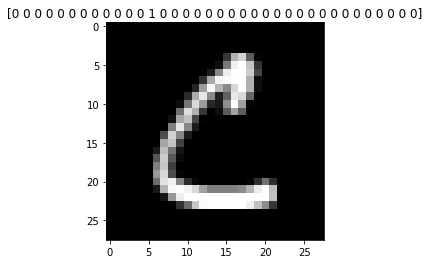

In [46]:
plt.imshow(data[30000].reshape(28,28),cmap='gray')
plt.title(str(labels[30000]))

In [47]:
classes_total=labels.sum(axis=0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [48]:
classes_total.max()

57825

In [49]:
X_train, X_test, y_train, y_test= train_test_split(data, labels, test_size=0.2, random_state=1, stratify=labels)

In [50]:
X_train.shape, X_test.shape

((353960, 28, 28, 1), (88490, 28, 28, 1))

In [51]:
y_train.shape, y_test.shape

((353960, 36), (88490, 36))

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
augmentation=ImageDataGenerator(rotation_range=10, zoom_range=0.05, width_shift_range=0.1,height_shift_range=0.1 , horizontal_flip= False )

In [54]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [55]:
network = Sequential()

network.add(Conv2D(filters=32, kernel_size=(3,3) , activation='relu',input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=64, kernel_size=(3,3) , activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation='relu'))
network.add(Dense(128,activation='relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [57]:
file_model='custom_ocr.model'
epochs=20
batch_size=128


In [58]:
checkPointer = ModelCheckpoint(file_model, monitor='val_loss', verbose=1, save_best_only=True)

In [59]:
history=network.fit( augmentation.flow(X_train, y_train, batch_size=batch_size),
                    validation_data= (X_test, y_test),
                    steps_per_epoch= len(X_train) , epochs=epochs,
                     verbose=1, callbacks=[checkPointer])

Epoch 1/20
  2766/353960 [..............................] - ETA: 13:11:14 - loss: 0.4340 - accuracy: 0.8734WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 7079200 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: val_loss improved from inf to 0.16932, saving model to custom_ocr.model
INFO:tensorflow:Assets written to: custom_ocr.model/assets
353960/353960 [==============================] - 404s 1ms/step - loss: 0.4340 - accuracy: 0.8734 - val_loss: 0.1693 - val_accuracy: 0.9486


In [60]:
len(X_train)

353960

In [61]:
classes_weight={}
for i in range (0, len(classes_total)):
  #print(i)
  classes_weight[i]=classes_total.max()/classes_total[i]

In [62]:
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 43s 16ms/step - loss: 0.1693 - accuracy: 0.9486


[0.1693248748779297, 0.9486495852470398]

X_train=X_train/255.0

In [63]:
len(X_train)

353960

In [64]:
classes_weight={}
for i in range (0, len(classes_total)):
  #print(i)
  classes_weight[i]=classes_total.max()/classes_total[i]

In [66]:
X_test.shape

(88490, 28, 28, 1)

In [67]:
predictions=network.predict(X_test, batch_size=batch_size)

In [68]:
predictions[0].shape

(36,)

In [69]:
len(predictions[0])

36

In [70]:
np.argmax(predictions[0])

0

In [71]:
name_labels[0]

NameError: ignored

In [72]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
labels[0]

In [ ]:
network.evaluate(X_test, y_test)

In [73]:
network.save('network', save_format='h5')

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
!cp network /content/drive/MyDrive/lab\files